In [1]:
import numpy as np
import matplotlib.pyplot as plt

from k_means_ import k_means, assign_closest_centroids, plot_J_hist
np.set_printoptions(precision=3)


### Sample data of height and weight to create t-shirt size groups out of (S, M, L)

| Height (in) | Weight (lb) |
| :---------: | :---------: |
|      62     |     112     |
|      61     |     125     |
|      63     |     120     |
|      63     |     115     |
|      60     |     116     |
|      67     |     130     |
|      69     |     148     |
|      68     |     140     |
|      68     |     131     |
|      70     |     150     |
|      73     |     158     |
|      74     |     160     |
|      79     |     162     |
|      78     |     170     |
|      77     |     169     |    

In [2]:
X = np.array([[62, 112], [61, 125], [63, 120], [63, 115], [60, 116], [67, 130], [69, 148], [68, 140], 
              [68, 131], [70, 150], [73, 158], [74, 160], [79, 162], [78, 170], [77, 169]])

K = 3 # we want clusters for S, M, L

iterations = 10


In [3]:
# Run the whole K-means process 100 times and pick the best set of clusters
best_cost = float("inf")
best_centroids = None

for _ in range(100):
    centroids, J_hist = k_means(X, K, iterations)
    if J_hist[-1] < best_cost:
        best_cost = J_hist[-1]
        best_centroids = centroids
        print(f"Improvement - Cost: {best_cost}, Centroids: {best_centroids}")


Improvement - Cost: 39.64952380952381, Centroids: [[ 63.429 121.286]
 [ 69.    146.   ]
 [ 76.2   163.8  ]]


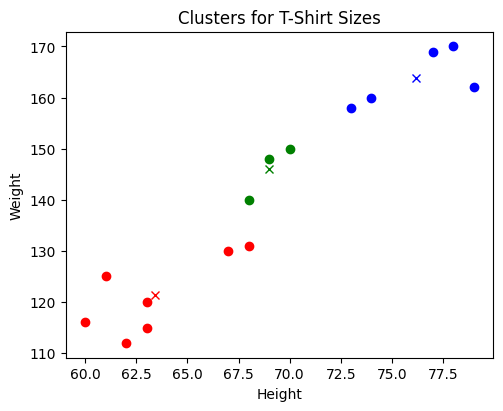

In [4]:
tshirt_sizes = {
    0: "r", # size 1: red
    1: "g", # size 2: green
    2: "b"  # size 3: blue
}

centroid_indices = assign_closest_centroids(X, best_centroids)

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(12, 4))
ax.set_aspect(0.25)

for k in range(len(best_centroids)):
    centroid = best_centroids[k]
    points = X[centroid_indices == k]
    
    for point in points:
        ax.plot(point[0], point[1], f"{tshirt_sizes[k]}o")
    ax.plot(centroid[0], centroid[1], f"{tshirt_sizes[k]}x")

ax.set_title("Clusters for T-Shirt Sizes")
ax.set_xlabel("Height")
ax.set_ylabel("Weight")
plt.show()


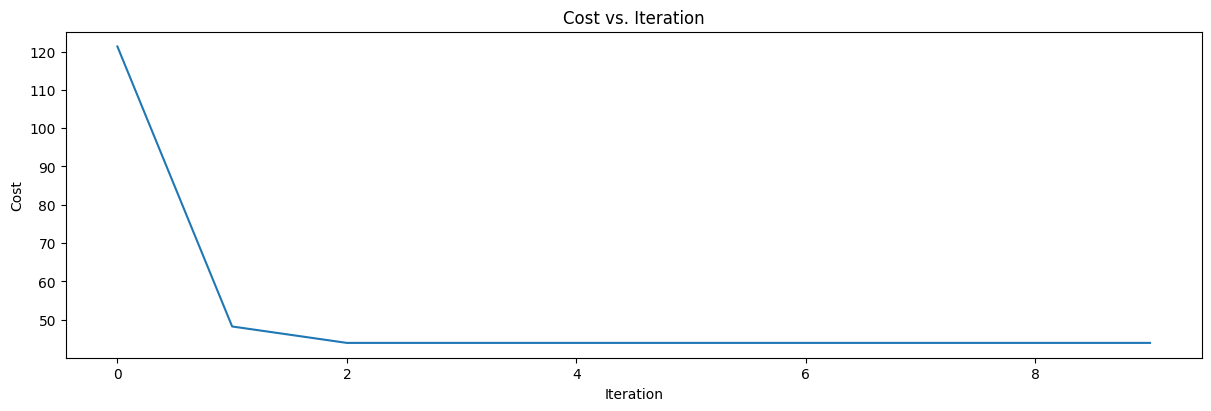

In [5]:
plot_J_hist(J_hist)
